In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('ps.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Null Check

<AxesSubplot:>

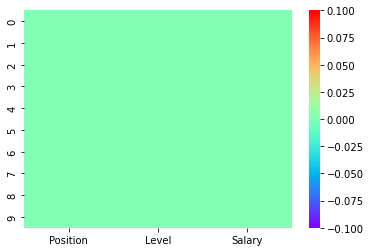

In [5]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='rainbow')

No need of Encoding here as level is already present

In [6]:
X=df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
Y=df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


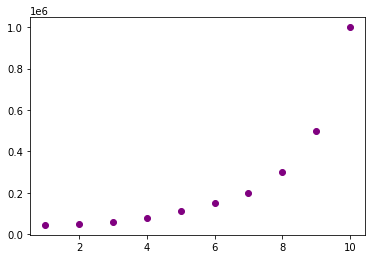

In [9]:
plt.scatter(X, Y, c='purple')

### Splitting

In [10]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression

In [11]:
LR=LinearRegression()

In [12]:
LR.fit(X_train, Y_train)
y_pred=LR.predict(X_test)
score=r2_score(Y_test, y_pred)
score

0.8451346684575975

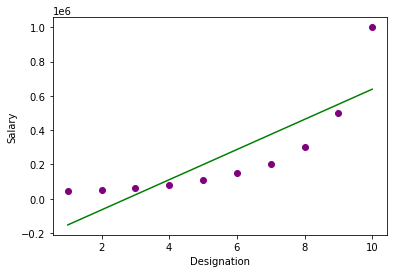

In [15]:
plt.scatter(X, Y, c='purple')
plt.plot(X, LR.predict(X), c='green')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [16]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
level=float(input())
LR.predict([[level]])

7


array([[374956.89655172]])

In [19]:
level = float(input())
LR.predict([[level]])

9


array([[550732.75862069]])

# Polynomial Regression

### Degree 2

In [20]:
df = pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [21]:
PF = PolynomialFeatures(degree=2)
X = PF.fit_transform(X)

In [22]:
X_train, X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.3, random_state=42) 

In [23]:
PR2=LinearRegression()
PR2.fit(X_train, Y_train)
y_pred=PR2.predict(X_test)
score=r2_score(Y_test, y_pred)
score

0.7896604512664295

### Degree 5 

In [24]:
df = pd.read_csv('ps.csv')
X1=df.iloc[:,1:2]
Y1=df.iloc[:,2:]

In [25]:
PF = PolynomialFeatures(degree=5)
X1 = PF.fit_transform(X1)
X_train, X_test,Y_train,Y_test=train_test_split(X1, Y1,
                                               test_size=0.3, random_state=42) 
PR5=LinearRegression()
PR5.fit(X_train, Y_train)
y_pred=PR5.predict(X_test)
score=r2_score(Y_test, y_pred)
score

0.9949078503291525

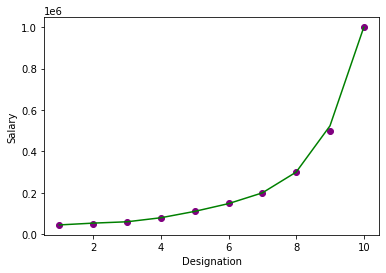

In [27]:
X=df.iloc[:,1:2]
plt.scatter(X, Y, c='purple')
plt.plot(X, PR5.predict(PF.fit_transform(X)), c='green')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [28]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [29]:
level=float(input())
PR5.predict(PF.fit_transform([[level]]))

5


array([[110329.55043589]])